In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install --upgrade pandas-datareader

In [3]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.799057
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,66.969292
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.879601


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB


In [6]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [7]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

# Data Visualization

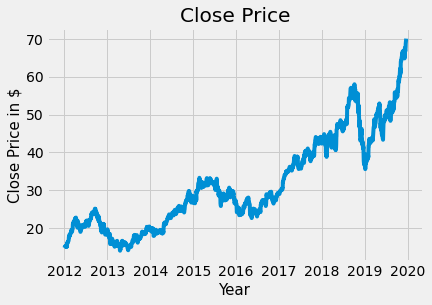

In [8]:
plt.plot(df['Close'])
plt.xlabel('Year', fontsize=15)
plt.ylabel('Close Price in $', fontsize=15)
plt.title('Close Price')
plt.show()

 **Observation**

The trend fluctuate during the period but still it rise and at the peak in the year 2020 as compared to rest of the years.


# Split Dataset

In [9]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len

1603

In [10]:
# scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
print(scaled_data.shape)
print(scaled_data)

(2003, 1)
[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [11]:
train_data = scaled_data[0:training_data_len, :]
print(len(train_data))
x_train, y_train = [], []

for i in range(100, len(train_data)):
  x_train.append(train_data[i-100:i, 0])
  y_train.append(train_data[i,0])
  if i<=101:
    print(x_train)
    print(y_train)

1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464214, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0

In [12]:
test_data = scaled_data[training_data_len: , :]
print(len(test_data))
x_test, y_test = [], []

for i in range(100, len(test_data)):
  x_test.append(test_data[i-100:i, 0])
  y_test.append(train_data[i,0])
  if i<=101:
    print(x_test)
    print(y_test)

400
[array([0.5840976 , 0.58107023, 0.58694685, 0.58485443, 0.59019677,
       0.58926183, 0.59117621, 0.58814884, 0.58636808, 0.58356332,
       0.59856648, 0.60564509, 0.61223397, 0.61521678, 0.61290181,
       0.60506631, 0.60297388, 0.60764846, 0.60061435, 0.60105957,
       0.59233369, 0.59188854, 0.57831003, 0.58191611, 0.5772861 ,
       0.574882  , 0.5626391 , 0.57270052, 0.57149854, 0.57746415,
       0.57572789, 0.58494342, 0.57043004, 0.57701893, 0.58846051,
       0.60008013, 0.5990562 , 0.58805984, 0.6020835 , 0.6034191 ,
       0.60154929, 0.60395332, 0.59927874, 0.6058677 , 0.60390882,
       0.60466565, 0.61085388, 0.61895648, 0.61624078, 0.60186089,
       0.59709732, 0.59878902, 0.64869556, 0.67491762, 0.67758883,
       0.68239696, 0.67367108, 0.67429435, 0.68155107, 0.6755409 ,
       0.68150651, 0.68542426, 0.68760575, 0.7013178 , 0.72028314,
       0.710845  , 0.70897512, 0.70901968, 0.71097855, 0.71396136,
       0.72188585, 0.72972128, 0.74432371, 0.75345025, 0.

In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)

(1503, 100) (1503,)


In [14]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape, y_test.shape)

(300, 100) (300,)


#RNN model

In [23]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [25]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [26]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

In [27]:
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)

In [28]:
rm1 = np.sqrt(mean_squared_error(y_train,train_predictions))
rm1

14.036845114267116

In [29]:
rm2 = np.sqrt(mean_squared_error(y_test,test_predictions))
rm2

14.660998921136548

In [30]:
print(train_predictions.shape, test_predictions.shape)


(1503, 1) (300, 1)


In [31]:
math.sqrt(mean_squared_error(y_train,train_predictions))

14.036845114267116

In [32]:
math.sqrt(mean_squared_error(y_test,test_predictions))

14.660998921136548

#Plot the Graph(Predicted stocks)


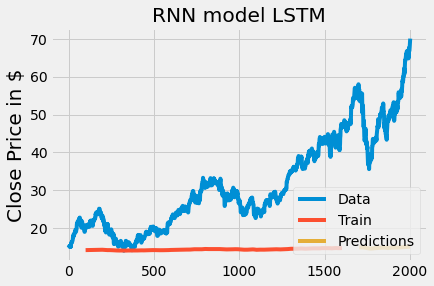

In [33]:
# train predictions
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[100:len(train_predictions)+100, :] = train_predictions
# test predictions
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predictions)+(100*2):len(dataset), :] = test_predictions
plt.title('RNN model LSTM')
plt.ylabel('Close Price in $', fontsize = 20)

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Data', 'Train', 'Predictions'], loc='lower right')
plt.show()